# LINEAR REGRESSION


Importing modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


Loading the data

In [3]:
df = pd.read_csv('./students_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
x = df['Hours'].values.reshape(-1, 1) 
# Reshaping to 2D array cuz sklearn take the x as a set of input features, as we have only one feature so we are reshaping it to 2D array
y = df['Scores']


In [12]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
pred = model.predict(x_test)
print(pred)
print(y_test)

[61.51142681 51.90099709 74.00498544 82.65437219]
18    67
1     47
19    69
8     81
Name: Scores, dtype: int64


In [25]:
print("MAE:", mean_absolute_error(y_test,pred)) # if the mae is close to 0, the model is good
print("R2 Score:", r2_score(y_test, pred)) # if the r2 score is close to 1, the model is good

MAE: 4.262231977411108
R2 Score: 0.862531820883917


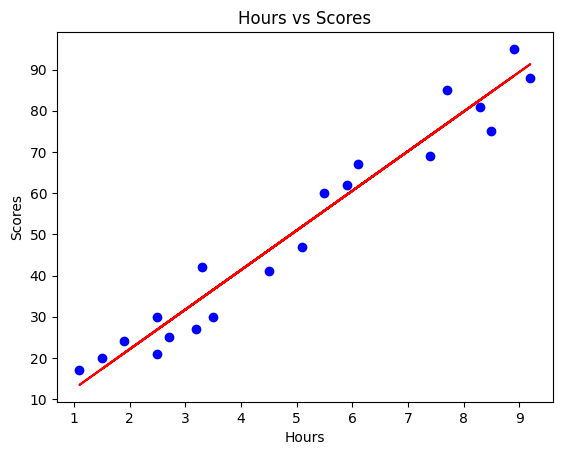

In [30]:
plt.scatter(x,y,color='blue')
plt.plot(x,model.predict(x),color='red')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [33]:
# if the student studies for 9.5 hours, what score will they get?
model.predict([[9.5]]) 

array([94.18688785])

### K-FOLD CROSS VALIDATION

Splitting the Data:
- Your data is divided into 'k' equal-sized folds (subsets)
- For example, if k=5, your data is split into 5 parts

Training and Testing Process:
- For each fold:
- Take one fold as the test set
- Use the remaining k-1 folds as the training set
- Train the model on the training set
- Test the model on the test set
- Record the performance metrics

This process is repeated k times, with each fold getting a chance to be the test set

In [39]:
from sklearn.model_selection import KFold, cross_val_score
# kfold cross validation splits the data into k folds and finds the r2 for each of them 
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_results =cross_val_score(model, x, y, cv=kf)
cv_results

array([0.97248635, 0.8957015 , 0.956401  ])

In [42]:
print(np.mean(cv_results))
print(np.std(cv_results))
print(np.quantile(cv_results,[0.25,0.5,0.75]))

0.9415296154343477
0.033064044409985366
[0.92605125 0.956401   0.96444367]


### RIDGE REGRESSION

Ridge Regression is a type of linear regression that adds regularization to prevent overfitting

Regularization:
- Adds a penalty for large coefficients
- The penalty is proportional to the square of the coefficient values
- This makes the model simpler by shrinking coefficients

In [46]:
from sklearn.linear_model import Ridge

ridge_scores = []
for alpha in [0.1, 1, 10, 100, 1000]:
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    ridge_scores.append(model.score(x_test, y_test))

ridge_scores



[0.8629497873877117,
 0.8664085794738989,
 0.8754494914077181,
 0.22395353636616178,
 -1.8750529304210448]

### LASSO REGRESSION (Least Absolute Shrinkage and Selection Operator)

- **Regularization Type**: L1 (uses absolute values of coefficients)  
  `Loss = RSS + α * Σ|β|`

- **Key Difference from Ridge**:  
  - **Ridge** (L2): Shrinks coefficients but keeps all features  
  - **Lasso** (L1): Can shrink some coefficients to **zero** → **feature selection**

- **Feature Selection**:  
  - Lasso creates a **sparse model** by removing unimportant features  
  - Makes the model simpler and more interpretable

- **When to Use Lasso**:  
  - To identify important features  
  - When many features are present, but only a few matter  
  - When you want a more interpretable, minimal model

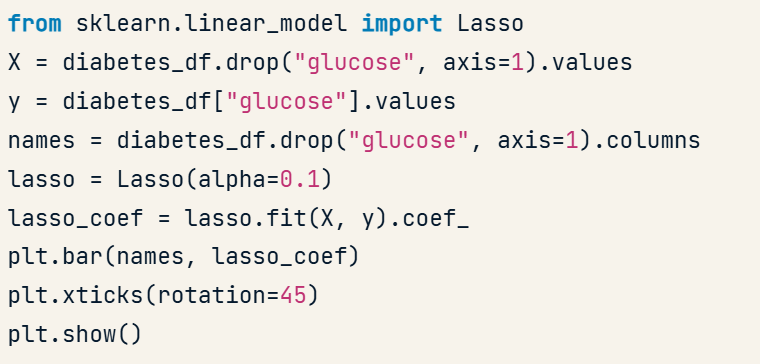
'''
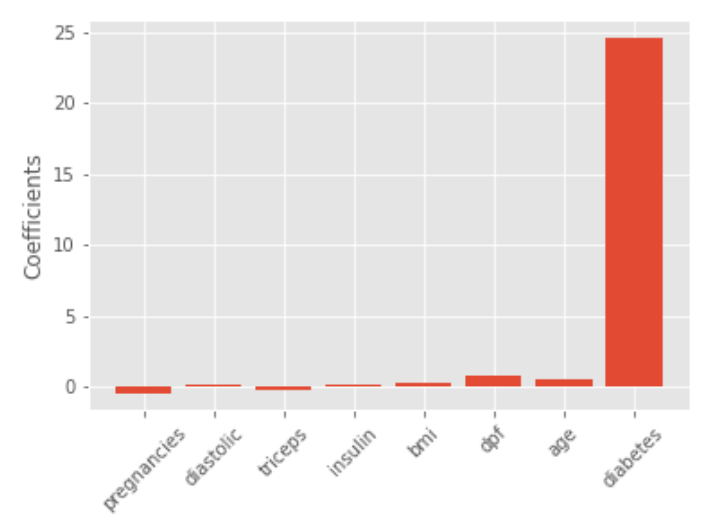

#### What are Coefficients?

In a simple linear regression model:
`Score = β₀ + β₁ * Hours`

- **β₀** is the intercept (score when Hours = 0)  
- **β₁** is the coefficient for Hours

Examples:
- If `β₁ = 5`, every extra hour studied increases the score by 5
- If `β₁ = 10`, every extra hour studied increases the score by 10

In a model with multiple features:  
`Score = β₀ + β₁ * Hours + β₂ * SleepHours + β₃ * PracticeTests`

- **β₁** → Hours  
- **β₂** → SleepHours  
- **β₃** → PracticeTests  

### Ridge vs Lasso

- **Ridge**: Shrinks coefficients but doesn't make them zero  
- **Lasso**: Can make some coefficients exactly zero (removes features)

**Coefficients (β values)** show how much each feature affects the prediction.
